<<<<<<< local


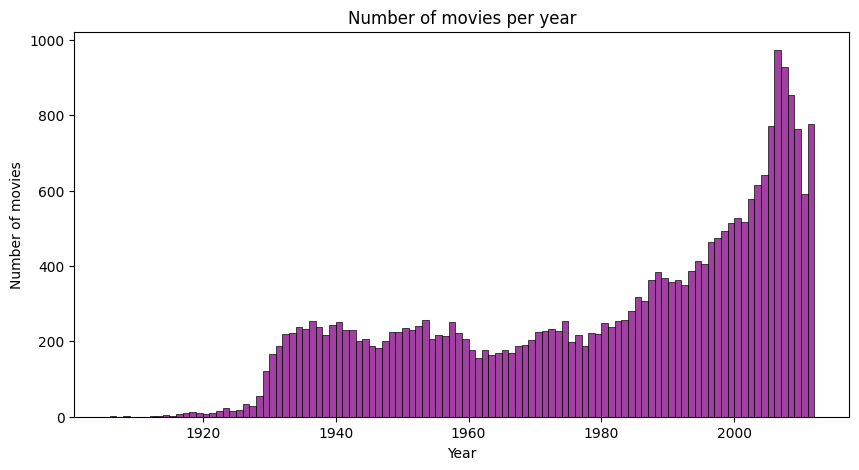

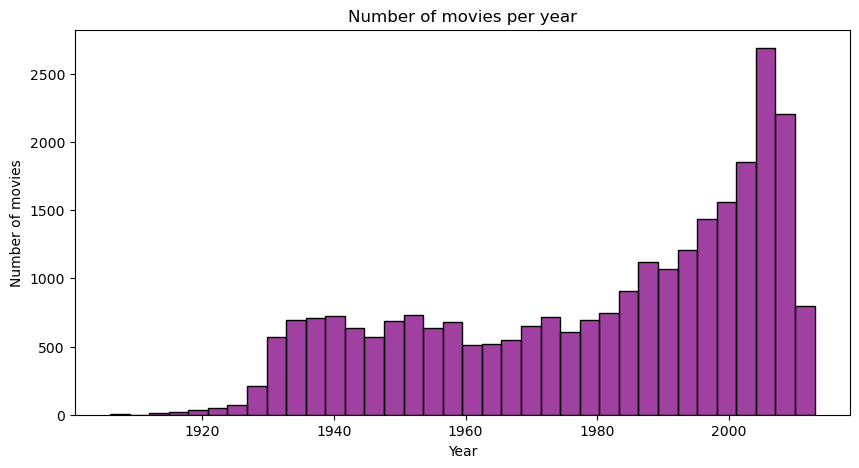

>>>>>>> remote


In [ ]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
#Number of movies per year
plt.figure(figsize=(10,5))
ax = sns.histplot(movie_metadata_filtered,x='Movie_release_date',stat='count',color="purple",bins = 106).set(title="Number of movies per year",xlabel="Year",ylabel="Number of movies")

<<<<<<< REMOTE CELL DELETED >>>>>>>
# Processing character metadata 

We may want to look at character names as it may be part of the title of the movie (Batman in Batman movies for example). To do this we add here the character names in the movie_metadata_database ('movie_metadata_filtered'). And we later add a column for wether a character name is in the title or not.

In [ ]:
#Drop row without character names
movie_characters = movie_metadata_filtered.copy(deep=True)

character_metadata_copy = character_metadata.copy(deep=True)
character_metadata_copy.dropna(subset=['Character_name'], inplace=True)

character_metadata_copy.drop(labels=["Movie_release_date","Freebase_movie_ID"],axis=1,inplace=True)

movie_characters=movie_characters.merge(character_metadata_copy, how='inner',left_on='Wikipedia_movie_ID', right_on='Wikipedia_movie_ID')

movie_characters = movie_characters[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date',  'Movie_box_office_revenue', 'Movie_runtime', 'Movie_countries', 'Movie_main_genre', 'Character_name', 'Freebase_character_ID']]


movie_characters = movie_characters.groupby('Wikipedia_movie_ID').agg({
    'Movie_name': 'first',  
    'Movie_box_office_revenue': 'first', 
    'Movie_runtime': 'first',  
    'Movie_countries': 'first',  
    'Movie_main_genre': 'first',  
    'Character_name': lambda x: list(x),  
    'Freebase_character_ID':  lambda x: list(x)
}).reset_index()
movie_characters.sample(5).head()

<<<<<<< local


,Wikipedia_movie_ID,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Freebase_character_ID
3099,1742101,Titanic,NaN,173.0,"[United States of America, Canada]",fiction,"[Isabella Paradine, Simon Doonan, Molly Brown]","[/m/0gxrpd9, /m/0gzfljb, /m/02nwr44]"
13151,21372616,Mandalay,NaN,65.0,[United States of America],thriller,[Betty Shaw],[/m/0gy78zj]
9276,9590609,While She Was Out,NaN,88.0,"[United States of America, Canada, Germany]",thriller,[Chuckie],[/m/0h33shm]
4124,2476100,An American Tail: The Treasure of Manhattan Is...,NaN,80.0,[United States of America],adventure,"[Toplofty, Cholena, Tiger, Papa Mousekewitz, P...","[/m/0bc4300, /m/0bc35w6, /m/0669rl_, /m/0669sc..."
12025,17776753,Spirit of the Forest,NaN,90.0,[Spain],family,"[Oak, Cebolo, Mrs. D'Abondo, Furi]","[/m/0h1jlsx, /m/0h32qcn, /m/0h2d1k9, /m/0h2j_pc]"


,Wikipedia_movie_ID,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Freebase_character_ID
503,164502,The Adventures of Baron Munchausen,8083123.0,127.0,"[United States of America, United Kingdom]",adventure,"[Sally Salt, Vulcan, Venus / Rose, Ray D. Tutto]","[/m/0h342yh, /m/0h321k5, /m/0gxtwhh, /m/0gwtvgw]"
7228,5812847,Gator,NaN,116.0,[United States of America],thriller,"[Gator McKlusky, Aggie Maybank]","[/m/0h14jd7, /m/0h5gy_r]"
5978,4243613,Friendship's Field,NaN,84.0,[United States of America],adventure,[Ira],[/m/05sm512]
6331,4694464,Adam & Steve,330116.0,99.0,[United States of America],romance,"[Ruth, Rhonda, Michael]","[/m/0h1dqsm, /m/0h1yxkq, /m/0h5h6kf]"
8091,7141343,Shtickmen,NaN,86.0,[United States of America],comedy,"[Jonothan Krastenberg, Jerry Martin, 'Buckeye'...","[/m/0lk7ygx, /m/0lk7yh3, /m/0lk7yll, /m/0lk7yg..."


>>>>>>> remote


In [ ]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
movie_characters.drop(labels=["Movie_name","Movie_box_office_revenue","Movie_runtime","Movie_countries","Movie_main_genre","Freebase_character_ID"],axis=1,inplace=True)

movie_metadata_filtered = movie_metadata_filtered.merge(movie_characters,how='left', on = 'Wikipedia_movie_ID')
movie_metadata_filtered.to_csv("Data/movies_preproced.csv")